In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('supermarket_sales.csv')
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


# Data Cleaning and Preparation

In [3]:
print("Dataframe Shape : ",df.shape)
print("number of duplicates in dataframe : ",df.duplicated().sum())

Dataframe Shape :  (1000, 17)
number of duplicates in dataframe :  0


In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

# changing the date column to datetime datatype and extracting month in "mmm" format

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df['Date'].dt.month.value_counts()

1    352
3    345
2    303
Name: Date, dtype: int64

In [8]:
df['Date_month']=df['Date'].dt.month_name().str[:3]

In [9]:
df['Date_month']

0      Jan
1      Mar
2      Mar
3      Jan
4      Feb
      ... 
995    Jan
996    Mar
997    Feb
998    Feb
999    Feb
Name: Date_month, Length: 1000, dtype: object

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Total'>

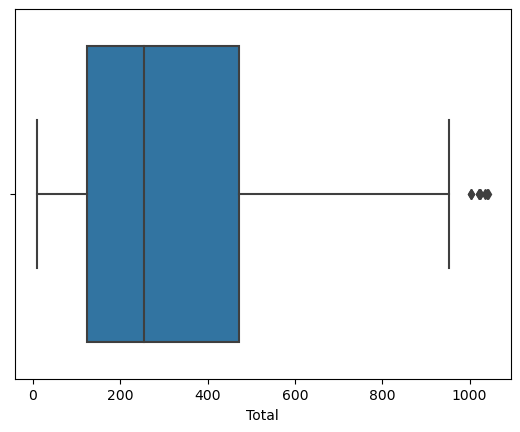

In [12]:
sns.boxplot(x=df['Total'])

# after finding the outlier using boxplot now removing them

In [13]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)

In [14]:
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
df_cleaned = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]
df_cleaned.shape

(991, 18)

In [44]:
print("Average Unit Price : ",df['Unit price'].mean())

Average Unit Price :  55.67212999999998


In [45]:
print("Total Sales per branch:")
df.groupby('Branch')['Quantity'].sum().reset_index()

Total Sales per branch:


,Branch,Quantity
0,A,1859
1,B,1820
2,C,1831


# Total Sales by Month and Branch

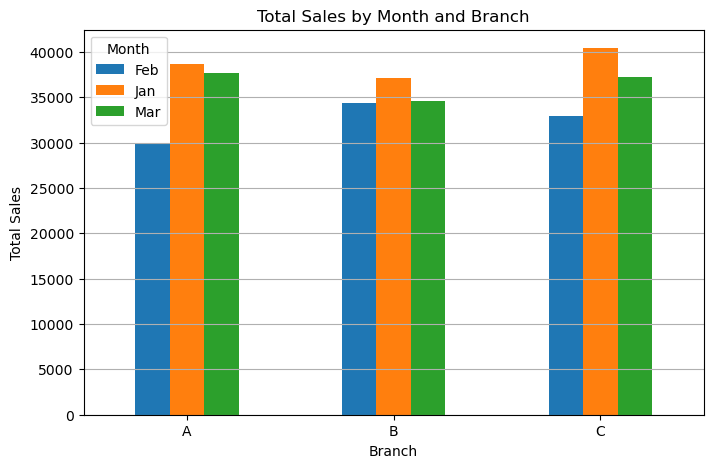

In [53]:
monthly_sales = df.groupby(['Branch', 'Date_month'])['Total'].sum().unstack(fill_value=0)

monthly_sales.plot(kind='bar', figsize=(8, 5))
plt.title('Total Sales by Month and Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Month')
plt.grid(axis='y')
plt.show()

In [16]:
top_category_interms_quantity=df_cleaned.groupby('Product line')['Quantity'].sum().reset_index().sort_values(['Quantity'],ascending=False)
top_3_category_quantity=top_category_interms_quantity.head(3)
top_3_category_quantity

,Product line,Quantity
0,Electronic accessories,971
2,Food and beverages,942
5,Sports and travel,910


In [17]:
top_category_interms_total=df_cleaned.groupby('Product line')['Total'].sum().reset_index().sort_values(['Total'],ascending=False)

total_sales = top_category_interms_total['Total'].sum()

top_category_interms_total['Percentage'] = (top_category_interms_total['Total'] / total_sales) * 100

top_3_categories_Revenue = top_category_interms_total.head(3)

top_3_categories_Revenue

,Product line,Total,Percentage
2,Food and beverages,55110.3840,17.564765
0,Electronic accessories,54337.5315,17.318442
5,Sports and travel,54120.7065,17.249336


In [18]:
df_cleaned.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar


In [19]:
payment_summary = df_cleaned.groupby('Payment')['Quantity'].sum()

total_quantity = payment_summary.sum()

payment_percentage = (payment_summary / total_quantity) * 100

result = pd.DataFrame({
    'Total Quantity': payment_summary,
    'Percentage': payment_percentage
}).reset_index()

In [20]:
result

,Payment,Total Quantity,Percentage
0,Cash,1876,34.612546
1,Credit card,1682,31.033210
2,Ewallet,1862,34.354244


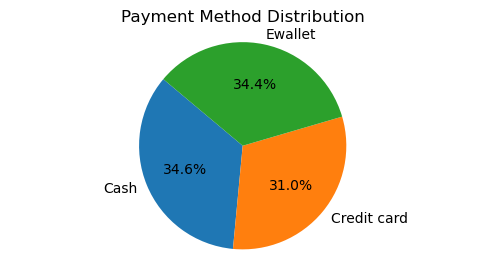

In [21]:
plt.figure(figsize=(6,3))
plt.pie(result['Total Quantity'], labels=result['Payment'], autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

# training and testing

In [22]:
New_df=df_cleaned[['Branch','Product line','Quantity','Unit price','Total']]

In [23]:
New_df.head()

,Branch,Product line,Quantity,Unit price,Total
0,A,Health and beauty,7,74.69,548.9715
1,C,Electronic accessories,5,15.28,80.2200
2,A,Home and lifestyle,7,46.33,340.5255
3,A,Health and beauty,8,58.22,489.0480
4,A,Sports and travel,7,86.31,634.3785


In [24]:
New_df['Branch'].value_counts()
New_df['Product line'].value_counts()

Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: Product line, dtype: int64

In [25]:
branch_mapping = {'A': 1, 'B': 2, 'C': 3} 
New_df['Branch'] = New_df['Branch'].replace(branch_mapping)

C:\Users\Rohit Yadav\AppData\Local\Temp\ipykernel_10808\4121685709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['Branch'] = New_df['Branch'].replace(branch_mapping)


In [26]:
Product_mapping={'Fashion accessories':1,'Food and beverages':2,'Electronic accessories':3,'Sports and travel':4,'Home and lifestyle':5,'Health and beauty':6}
New_df['Product line']=New_df['Product line'].replace(Product_mapping)

C:\Users\Rohit Yadav\AppData\Local\Temp\ipykernel_10808\2123010316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['Product line']=New_df['Product line'].replace(Product_mapping)


# Train test split on the dataset

In [27]:
from sklearn.model_selection import train_test_split
x=New_df.drop(columns=['Total'])
y=New_df['Total']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Applying StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Linear Regression algorithm

In [31]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [32]:
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [33]:
y_pred=LR.predict(x_test_scaled)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mean_absolute_error(y_pred,y_test)

58.585964502737205

In [36]:
mean_squared_error(y_pred,y_test)

6249.355428537658

# Decision Tree algorithm

In [37]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(x_train_scaled, y_train)


DecisionTreeRegressor()

In [38]:
DT_Y_pred=DT.predict(x_test_scaled)

In [39]:
mean_absolute_error(DT_Y_pred,y_test)

6.381731155778892

In [40]:
mean_squared_error(DT_Y_pred,y_test)

126.49558514698498

# dump decisiontreeregressor model using pickle

In [41]:
import pickle
pickle.dump(DT,open('decision_tree_model.pkl','wb'))

# Load pkl file using joblib and GUI Interface for giving inputs

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import tkinter as tk
from tkinter import messagebox, StringVar, OptionMenu
import joblib  # For loading the .pkl file

# Load the pre-trained Decision Tree model from a .pkl file
DT = joblib.load('decision_tree_model.pkl')  # Replace with your actual model file path

# Define mappings for categorical variables
branch_mapping = {'A': 1, 'B': 2, 'C': 3}
product_line_mapping = {
    'Fashion accessories': 1,
    'Food and beverages': 2,
    'Electronic accessories': 3,
    'Sports and travel': 4,
    'Home and lifestyle': 5,
    'Health and beauty': 6
}

# Function to predict Total based on user input
def predict_total():
    try:
        # Get user input from dropdowns and entry fields
        branch = branch_var.get()
        product_line = product_line_var.get()
        quantity = int(quantity_entry.get())
        unit_price = float(unit_price_entry.get())
        
        # Convert categorical inputs to numerical values
        branch_num = branch_mapping[branch]
        product_line_num = product_line_mapping[product_line]
        
        # Create a DataFrame from user input
        input_data = pd.DataFrame({
            'Branch': [branch_num],
            'Product line': [product_line_num],
            'Quantity': [quantity],
            'Unit price': [unit_price]
        })
        
        # Make prediction
        predicted_total = DT.predict(input_data)
        
        # Display result in message box
        messagebox.showinfo("Prediction Result", f"The predicted Total is: {predicted_total[0]:.2f}")
        
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")
    except KeyError:
        messagebox.showerror("Input Error", "Invalid selection for Branch or Product line.")

# Create the main window with a larger size and light grey background
root = tk.Tk()
root.title("Total Prediction using Decision Tree")
root.geometry("600x400")  # Set window size
root.configure(bg='lightgrey')  # Set background color to light grey

# Create a frame for better layout management
frame = tk.Frame(root, bg='lightgrey', padx=10, pady=10)
frame.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

# Centered header label for instructions

# Dropdown for Branch selection
branch_var = StringVar(root)
branch_var.set('A')  # Default value
branch_options = ['A', 'B', 'C']
tk.Label(frame, text="Select Branch :", bg='lightgrey', font=("Georgia", 12, "bold")).grid(row=0, column=0, sticky=tk.W, pady=(5, 5))
branch_menu = OptionMenu(frame, branch_var, *branch_options)
branch_menu.config(font=("Georgia", 12), width=25)  # Fixed width for dropdown
branch_menu.grid(row=0, column=1)

# Dropdown for Product line selection with predefined options
product_line_var = StringVar(root)
product_line_var.set('Fashion accessories')  # Default value
product_line_options = list(product_line_mapping.keys())
tk.Label(frame, text="Select Product line :", bg='lightgrey', font=("Georgia", 12, "bold")).grid(row=1, column=0, sticky=tk.W, pady=(5, 5))
product_line_menu = OptionMenu(frame, product_line_var, *product_line_options)
product_line_menu.config(font=("Georgia", 12), width=25)  # Fixed width for dropdown
product_line_menu.grid(row=1, column=1)

# Entry field for Quantity with fixed width
tk.Label(frame, text="Quantity :", bg='lightgrey', font=("Georgia", 12, "bold")).grid(row=2, column=0, sticky=tk.W, pady=(5, 5))
quantity_entry = tk.Entry(frame, font=("Georgia", 12), width=27)  # Fixed width for entry field
quantity_entry.grid(row=2, column=1)

# Entry field for Unit price with fixed width
tk.Label(frame, text="Unit price :", bg='lightgrey', font=("Georgia", 12, "bold")).grid(row=3, column=0, sticky=tk.W, pady=(5, 5))
unit_price_entry = tk.Entry(frame, font=("Georgia", 12), width=27)  # Fixed width for entry field
unit_price_entry.grid(row=3, column=1)

# Create a button to make the prediction with larger size and padding
predict_button = tk.Button(frame, text="Predict Total", command=predict_total,
                            font=("Sanserif", 14), bg="#4CAF50", fg="white")
predict_button.grid(row=4, columnspan=2, pady=(10, 0))

# Start the Tkinter event loop
root.mainloop()


C:\Users\Rohit Yadav\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
#